<a href="https://colab.research.google.com/github/canmike/gis-segmentation/blob/main/gis_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Getting Data

In [1]:
!wget -O data.zip https://www.dropbox.com/scl/fi/k75ag58i704c7lgsdsvia/C2Seg_AB_splitted.zip?rlkey=jzxsa9ps06x64vfxt4e6rl0l5

--2024-11-18 16:02:18--  https://www.dropbox.com/scl/fi/k75ag58i704c7lgsdsvia/C2Seg_AB_splitted.zip?rlkey=jzxsa9ps06x64vfxt4e6rl0l5
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9d2acf5210929d920c9235c999.dl.dropboxusercontent.com/cd/0/inline/CemKJ2p_4r2QRHMGg9t1ujH8sGyRbcTRL-04JC23rQUt2eHxS_mNc494uo33UYzJhc--vEkS2o-SJYLnPtq9fas9Q0bvEdErDlDkrn8hoHLCxXxTFfXjUryh1BFcr2VA-kIqjsXBCYsxykHmTyCwqadT/file# [following]
--2024-11-18 16:02:19--  https://uc9d2acf5210929d920c9235c999.dl.dropboxusercontent.com/cd/0/inline/CemKJ2p_4r2QRHMGg9t1ujH8sGyRbcTRL-04JC23rQUt2eHxS_mNc494uo33UYzJhc--vEkS2o-SJYLnPtq9fas9Q0bvEdErDlDkrn8hoHLCxXxTFfXjUryh1BFcr2VA-kIqjsXBCYsxykHmTyCwqadT/file
Resolving uc9d2acf5210929d920c9235c999.dl.dropboxusercontent.com (uc9d2acf5210929d920c9235c999.dl.dropboxusercontent.com)... 162.125.

In [2]:
import zipfile

data_path = "data"
with zipfile.ZipFile("data.zip", "r") as zip_ref:
    print("Unzipping data...")
    zip_ref.extractall(data_path)

Unzipping data...


## 1.1. Visualize Data

In [3]:
from osgeo import gdal

def get_image(folder_path, index):
  file_path_msi = folder_path + '/msi/'+str(index)+'.tiff'
  file_path_sar = folder_path + '/sar/'+str(index)+'.tiff'
  file_path_label = folder_path + '/label/'+str(index)+'.tiff'

  img_msi = gdal.Open(file_path_msi)
  array_msi = img_msi.ReadAsArray()

  img_sar = gdal.Open(file_path_sar)
  array_sar = img_sar.ReadAsArray()

  img_label = gdal.Open(file_path_label)
  array_label = img_label.ReadAsArray()

  return array_msi, array_sar, array_label

folder_path = "/content/data/train"
index = 0
msi, sar, label = get_image(folder_path, index)

msi.shape, sar.shape, label.shape

((4, 128, 128), (2, 128, 128), (128, 128))

In [4]:
import numpy as np
from matplotlib.colors import ListedColormap

label_map = np.array([
      (0, 0, 0),          # 0 - Background (Black)
      (0, 0, 255),        # 1 - Surface water (Blue)
      (135, 206, 250),    # 2 - Street (Light Sky Blue)
      (255, 255, 0),      # 3 - Urban Fabric (Yellow)
      (128, 0, 0),        # 4 - Industrial, commercial and transport (Maroon)
      (139, 37, 0),       # 5 - Mine, dump, and construction sites (Reddish Brown)
      (0, 128, 0),        # 6 - Artificial, vegetated areas (Green)
      (255, 165, 0),      # 7 - Arable Land (Orange)
      (0, 255, 0),        # 8 - Permanent Crops (Lime Green)
      (154, 205, 50),     # 9 - Pastures (Yellow Green)
      (34, 139, 34),      # 10 - Forests (Forest Green)
      (139, 69, 19),      # 11 - Shrub (Saddle Brown)
      (245, 245, 220),    # 12 - Open spaces with no vegetation (Beige)
      (0, 255, 255),      # 13 - Inland wetlands (Cyan)
  ])

labels = [
    "Background", "Surface water", "Street", "Urban Fabric", "Industrial, commercial and transport",
    "Mine, dump, and construction sites", "Artificial, vegetated areas", "Arable Land",
    "Permanent Crops", "Pastures", "Forests", "Shrub", "Open spaces with no vegetation", "Inland wetlands"
]

cls_to_label = {i: label for i, label in enumerate(labels)}
label_to_cls = {label: i for i, label in enumerate(labels)}

cmap = ListedColormap(label_map / 255.0)
NUM_CLASSES = len(labels)
NUM_CLASSES

14

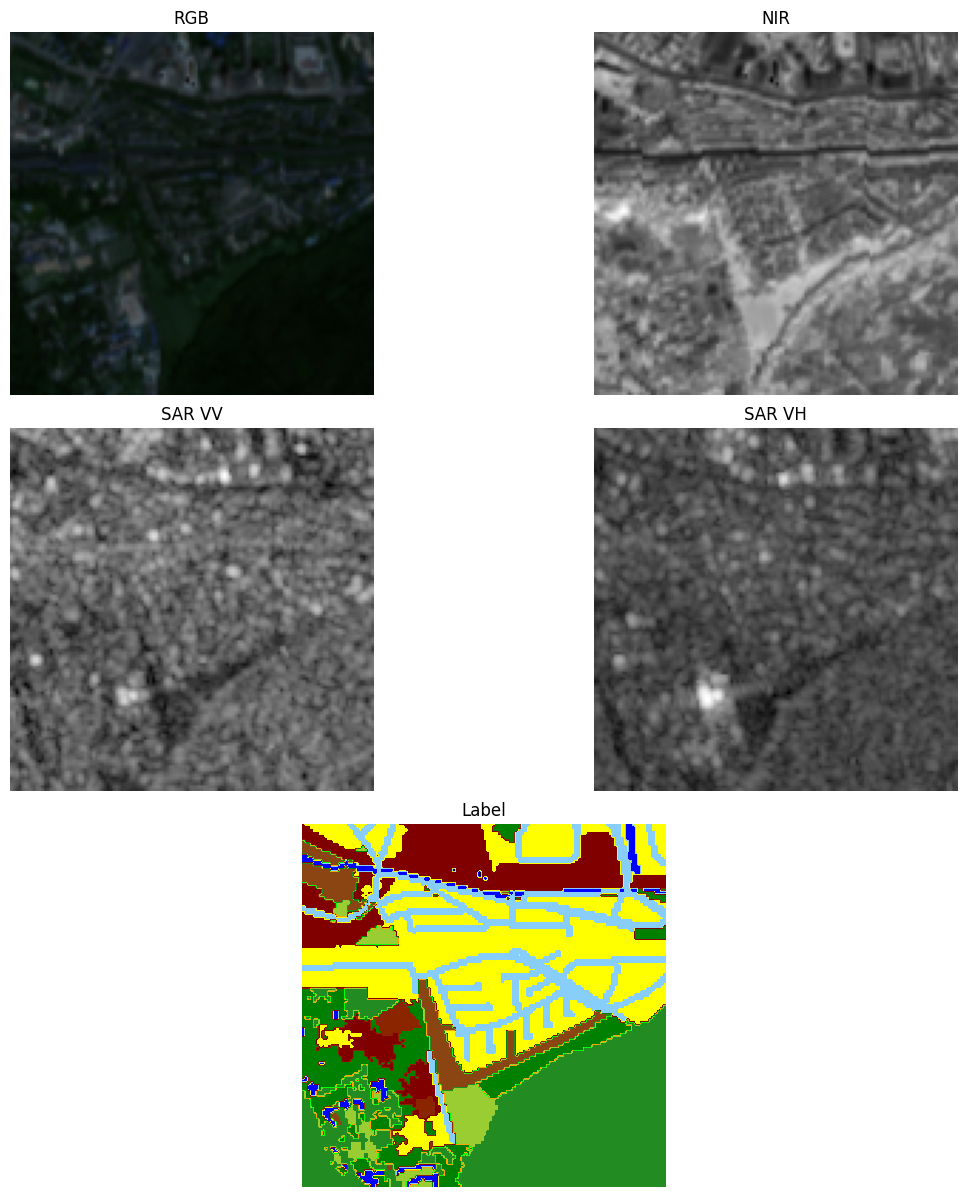

In [5]:
import matplotlib.pyplot as plt

def visualize_img(msi, sar, label):
  msi = msi.copy()
  msi = msi - msi.min()
  msi = msi / msi.max()

  plt.figure(figsize=(15, 15))

  plt.subplot(3, 2, 1)
  plt.title("RGB")
  plt.imshow(msi[0:3].transpose(1, 2, 0))
  plt.axis('off')

  plt.subplot(3, 2, 2)
  plt.title("NIR")
  plt.imshow(msi[3], cmap='gray')
  plt.axis("off")

  plt.subplot(3, 2, 3)
  plt.title("SAR VV")
  plt.imshow(sar[0], cmap='gray')
  plt.axis("off")

  plt.subplot(3, 2, 4)
  plt.title("SAR VH")
  plt.imshow(sar[1], cmap='gray')
  plt.axis("off")

  plt.subplot(3, 1, 3)
  plt.title("Label")
  plt.imshow(label, cmap=cmap, vmin=0, vmax=NUM_CLASSES-1)
  plt.axis("off")

  plt.subplots_adjust(wspace=0.01, hspace=0.09)

  plt.show()

visualize_img(msi, sar, label)

## 1.2. Create Datasets

In [6]:
%pip install albumentations -q

In [7]:
import torch
from torch.utils.data import Dataset
import os

class SegmentationDataset(Dataset):
  def __init__(self, folder_path, transform=None):
    self.folder_path = folder_path
    self.transform = transform
    self.data_count = len(os.listdir(folder_path + "/msi/"))

  def __len__(self):
    return self.data_count

  def __getitem__(self, index):
    msi, sar, label = get_image(self.folder_path, index)
    img = np.vstack([msi, sar])

    if self.transform:
      result = self.transform(image=img.transpose(1, 2, 0), mask=label)

      img = result["image"]
      label = result["mask"]


    return img, label

### 1.2.1. Define Augmentations

In [8]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transform = A.Compose([
    ToTensorV2(),
])

val_transform = A.Compose([
    ToTensorV2(),
])

test_transform = A.Compose([
    ToTensorV2(),
])

train_dataset = SegmentationDataset(folder_path="/content/data/train", transform=train_transform)
val_dataset = SegmentationDataset(folder_path="/content/data/val", transform=val_transform)
test_dataset = SegmentationDataset(folder_path="/content/data/test", transform=test_transform)

print(f"Length of train dataset: {len(train_dataset)}")
print(f"Length of val dataset: {len(val_dataset)}")
print(f"Length of test dataset: {len(test_dataset)}")

Length of train dataset: 191
Length of val dataset: 41
Length of test dataset: 41


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


### 1.2.2. Visualize Dataset

Shape of image: torch.Size([6, 128, 128])
Shape of label: torch.Size([128, 128])


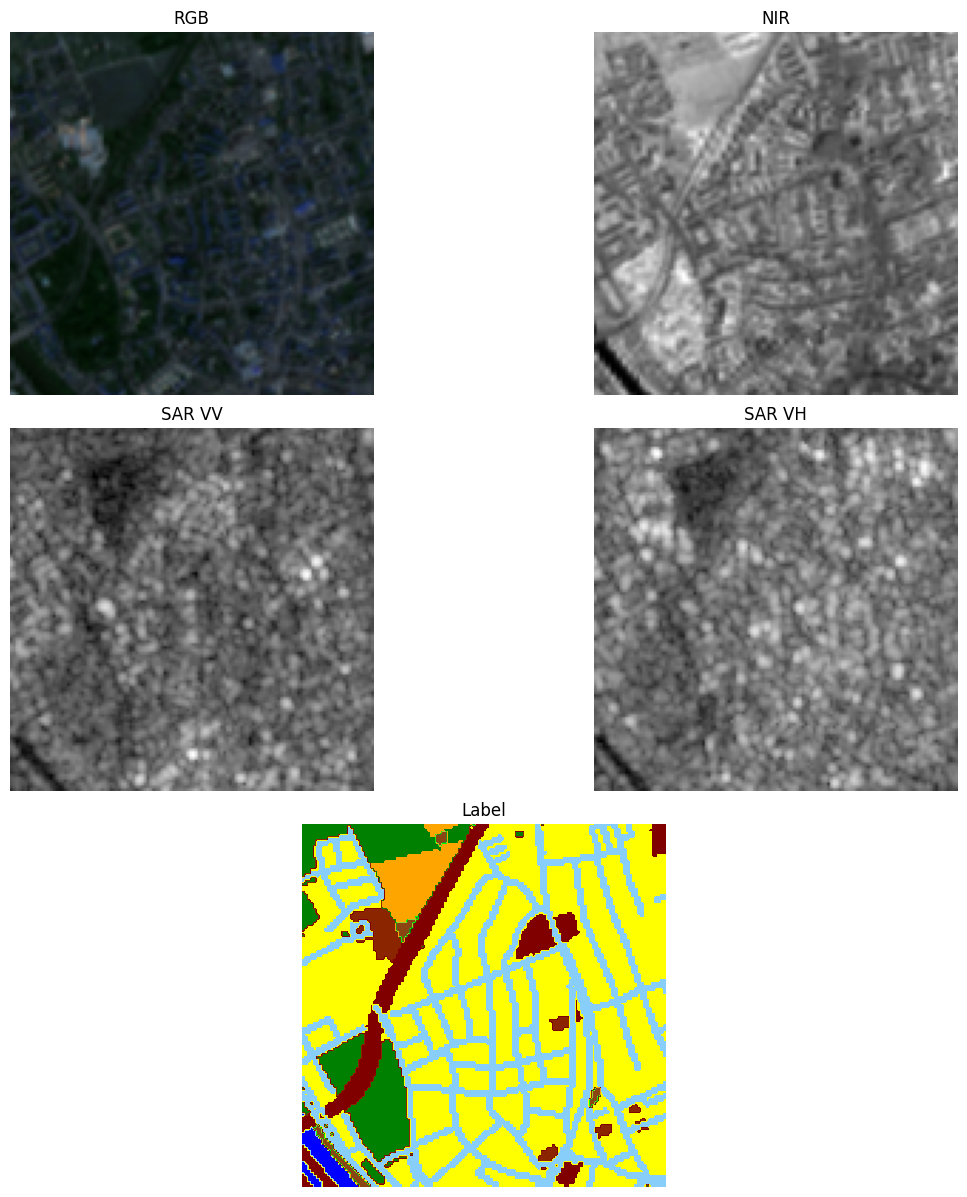

In [9]:
img, label = train_dataset[51]

msi = img[:4].numpy()
sar = img[4:].numpy()

print(f"Shape of image: {img.shape}")
print(f"Shape of label: {label.shape}")
visualize_img(msi, sar, label)

# 2. Creating Model

## 2.1. Setting Device-agnostic Code

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

## 2.2. Defining Model

In [11]:
%pip install segmentation-models-pytorch -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.9 MB/s eta 0:00:00


In [12]:
import segmentation_models_pytorch as smp

model = smp.UnetPlusPlus(
    encoder_name="timm-resnest14d",
    encoder_weights="imagenet",
    in_channels=6,
    classes=14,
).to(device)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/gluon_resnest14-9c8fe254.pth" to /root/.cache/torch/hub/checkpoints/gluon_resnest14-9c8fe254.pth
100%|██████████| 40.6M/40.6M [00:00<00:00, 306MB/s]


## 2.3. Getting Summary of Model

In [13]:
%pip install torchinfo -q

In [14]:
from torchinfo import summary

summary(model, input_size=(1, 6, 128, 128))

Layer (type:depth-idx)                        Output Shape              Param #
UnetPlusPlus                                  [1, 14, 128, 128]         --
├─ResNestEncoder: 1-1                         [1, 6, 128, 128]          --
│    └─Sequential: 2-1                        [1, 64, 64, 64]           --
│    │    └─Conv2d: 3-1                       [1, 32, 64, 64]           1,728
│    │    └─BatchNorm2d: 3-2                  [1, 32, 64, 64]           64
│    │    └─ReLU: 3-3                         [1, 32, 64, 64]           --
│    │    └─Conv2d: 3-4                       [1, 32, 64, 64]           9,216
│    │    └─BatchNorm2d: 3-5                  [1, 32, 64, 64]           64
│    │    └─ReLU: 3-6                         [1, 32, 64, 64]           --
│    │    └─Conv2d: 3-7                       [1, 64, 64, 64]           18,432
│    └─BatchNorm2d: 2-2                       [1, 64, 64, 64]           128
│    └─ReLU: 2-3                              [1, 64, 64, 64]           --
│    └─Ma

# 3. Training

In [15]:
%pip install torchmetrics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 49.4 MB/s eta 0:00:00


In [16]:
from torchmetrics.classification import MulticlassJaccardIndex

calculate_iou = MulticlassJaccardIndex(num_classes=NUM_CLASSES).to(device)

## 3.1. Define Training Loop

In [17]:
def train(model, train_loader, val_loader, loss_fn, optimizer, epochs):
  train_losses = []
  val_losses = []
  val_ious = []
  best_iou = 0.0
  best_epoch = 0

  for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
      images = images.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()

      outputs = model(images)
      loss = loss_fn(outputs, labels.long())
      loss.backward()
      optimizer.step()

      train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0.0
    val_iou = 0.0
    with torch.no_grad():
      for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = loss_fn(outputs, labels.long())
        iou = calculate_iou(outputs, labels)

        val_loss += loss.item()
        val_iou += iou.item()

      val_loss /= len(val_loader)
      val_losses.append(val_loss)

      val_iou /= len(val_loader)
      val_ious.append(val_iou)
    print(f"[Epoch {epoch+1}/{epochs}] | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val IoU: {100*val_iou:.2f}%")

    if val_iou > best_iou:
      best_iou = val_iou
      torch.save(model, "best_model.pth")
      best_epoch = epoch

  print(f"Best IoU: {100*best_iou:.2f}% saved at epoch {best_epoch+1}")
  return train_losses, val_losses, val_ious

## 3.2. Hyperparameters

In [18]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

epochs = 200

In [19]:
x, y = next(iter(train_loader))

print(f'x = shape: {x.shape}; type: {x.dtype}')
print(f'x = min: {x.min()}; max: {x.max()}')
print(f'y = shape: {y.shape}; class: {y.unique()}; type: {y.dtype}')

x = shape: torch.Size([32, 6, 128, 128]); type: torch.float32
x = min: -31.3063907623291; max: 5541.0
y = shape: torch.Size([32, 128, 128]); class: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       dtype=torch.int16); type: torch.int16


## 3.3. Train The Model

In [20]:
train_losses, val_losses, val_ious = train(model, train_loader, val_loader, loss_fn, optimizer, epochs)

[Epoch 1/200] | Train Loss: 2.3139 | Val Loss: 5.5867 | Val IoU: 2.60%
[Epoch 2/200] | Train Loss: 1.7308 | Val Loss: 2.1694 | Val IoU: 10.71%
[Epoch 3/200] | Train Loss: 1.4477 | Val Loss: 1.5888 | Val IoU: 17.08%
[Epoch 4/200] | Train Loss: 1.2683 | Val Loss: 1.4517 | Val IoU: 19.65%
[Epoch 5/200] | Train Loss: 1.1715 | Val Loss: 1.3784 | Val IoU: 20.69%
[Epoch 6/200] | Train Loss: 1.0770 | Val Loss: 1.3071 | Val IoU: 21.23%
[Epoch 7/200] | Train Loss: 0.9995 | Val Loss: 1.2346 | Val IoU: 22.44%
[Epoch 8/200] | Train Loss: 0.9077 | Val Loss: 1.0484 | Val IoU: 25.83%
[Epoch 9/200] | Train Loss: 0.8565 | Val Loss: 1.0279 | Val IoU: 26.04%
[Epoch 10/200] | Train Loss: 0.7955 | Val Loss: 0.9647 | Val IoU: 26.97%
[Epoch 11/200] | Train Loss: 0.7457 | Val Loss: 0.8988 | Val IoU: 29.68%
[Epoch 12/200] | Train Loss: 0.7108 | Val Loss: 0.9017 | Val IoU: 29.29%
[Epoch 13/200] | Train Loss: 0.6953 | Val Loss: 0.8474 | Val IoU: 32.63%
[Epoch 14/200] | Train Loss: 0.7037 | Val Loss: 0.9751 | Val 

## 3.4. Visualize The Loss and IoU

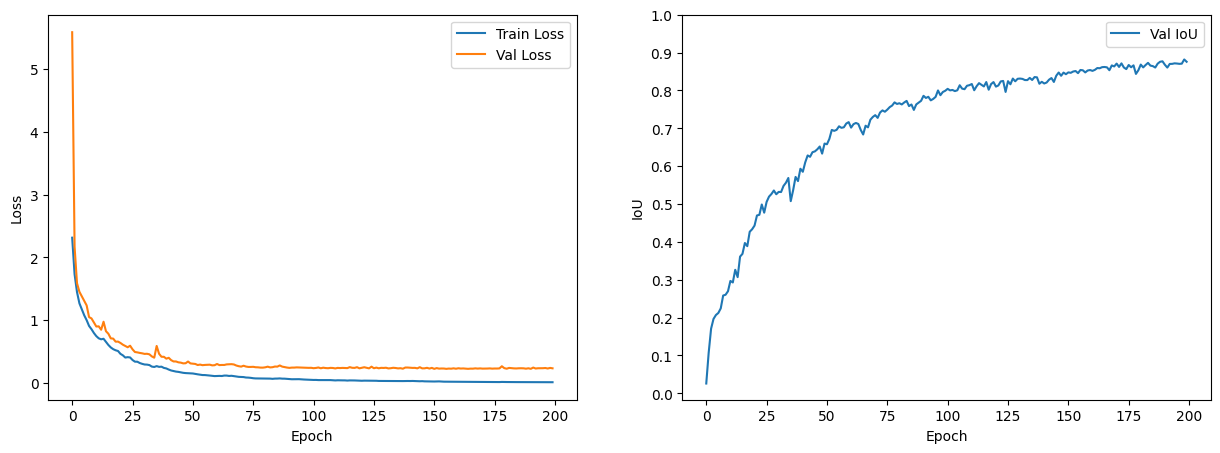

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_ious, label='Val IoU')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()

plt.show()

## 3.5. Evaluate Results in Test Dataset

In [22]:
from torchmetrics.classification import MulticlassJaccardIndex
from torchmetrics.classification import MulticlassF1Score
from torchmetrics.classification import MulticlassPrecision
from torchmetrics.classification import MulticlassRecall

calculate_iou = MulticlassJaccardIndex(num_classes=NUM_CLASSES, average=None).to(device)
calculate_f1 = MulticlassF1Score(num_classes=NUM_CLASSES, average=None).to(device)
calculate_precision = MulticlassPrecision(num_classes=NUM_CLASSES, average=None).to(device)
calculate_recall = MulticlassRecall(num_classes=NUM_CLASSES, average=None).to(device)

In [23]:
import pandas as pd

best_model = torch.load("best_model.pth").to(device)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

fscore_list = []
iou_list = []
precision_list = []
recall_list = []

best_model.eval()

for images, labels in test_loader:
  images = images.to(device)
  labels = labels.to(device)

  with torch.inference_mode():
    outputs = best_model(images)
    loss = loss_fn(outputs, labels.long())

  fscore_list.append(calculate_f1(outputs, labels))
  iou_list.append(calculate_iou(outputs, labels))
  precision_list.append(calculate_precision(outputs, labels))
  recall_list.append(calculate_recall(outputs, labels))

fscore =  torch.vstack(fscore_list).mean(dim=0)
iou =  torch.vstack(iou_list).mean(dim=0)
precision =  torch.vstack(precision_list).mean(dim=0)
recall =  torch.vstack(recall_list).mean(dim=0)

classwise_metrics_df = pd.DataFrame({
    "Class": [cls_to_label[i] for i in range(NUM_CLASSES)],
    "F1 Score": fscore.cpu().numpy(),
    "IoU": iou.cpu().numpy(),
    "Precision": precision.cpu().numpy(),
    "Recall": recall.cpu().numpy()
})

classwise_metrics_df

<ipython-input-23-b865b9571785>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model = torch.load("best_model.pth").to(device)


,Class,F1 Score,IoU,Precision,Recall
0,Background,0.276315,0.254813,0.287449,0.281875
1,Surface water,0.614650,0.574516,0.638561,0.599270
2,Street,0.893771,0.831501,0.897608,0.890839
3,Urban Fabric,0.924584,0.881729,0.914570,0.935573
4,"Industrial, commercial and transport",0.767866,0.740053,0.761563,0.780161
5,"Mine, dump, and construction sites",0.564924,0.529017,0.635129,0.540185
6,"Artificial, vegetated areas",0.938842,0.892913,0.951604,0.931360
7,Arable Land,0.715788,0.702076,0.714653,0.718792
8,Permanent Crops,0.298345,0.271432,0.345114,0.274426
9,Pastures,0.736126,0.685824,0.777235,0.710339


In [24]:
print(f"Mean F1 Score: {100*fscore.mean().item():.2f}%")
print(f"Mean IoU: {100*iou.mean().item():.2f}%")
print(f"Mean Precision: {100*precision.mean().item():.2f}%")
print(f"Mean Recall: {100*recall.mean().item():.2f}%")

Mean F1 Score: 63.28%
Mean IoU: 59.52%
Mean Precision: 65.09%
Mean Recall: 62.71%


## 4. Visualize Predictions in Test Dataset

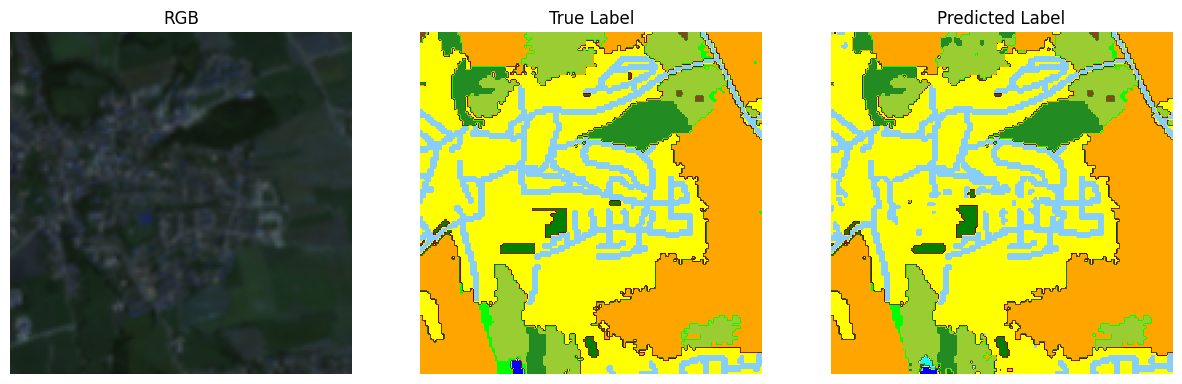

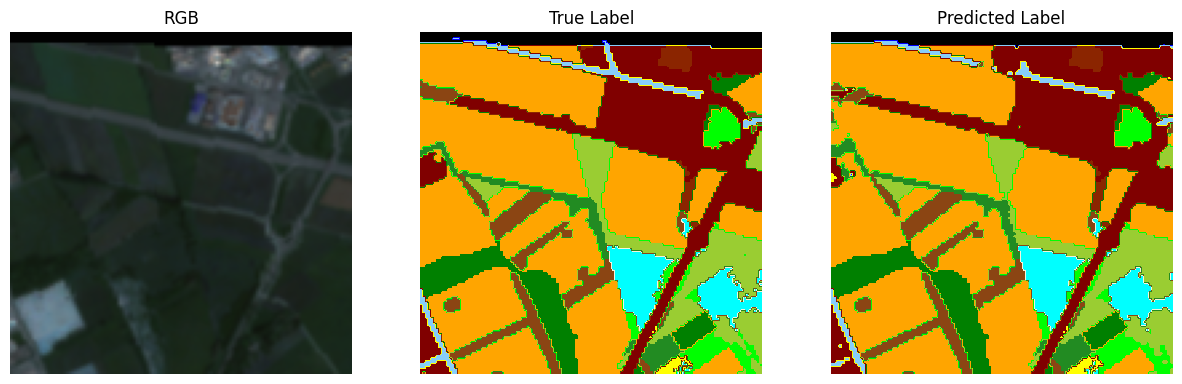

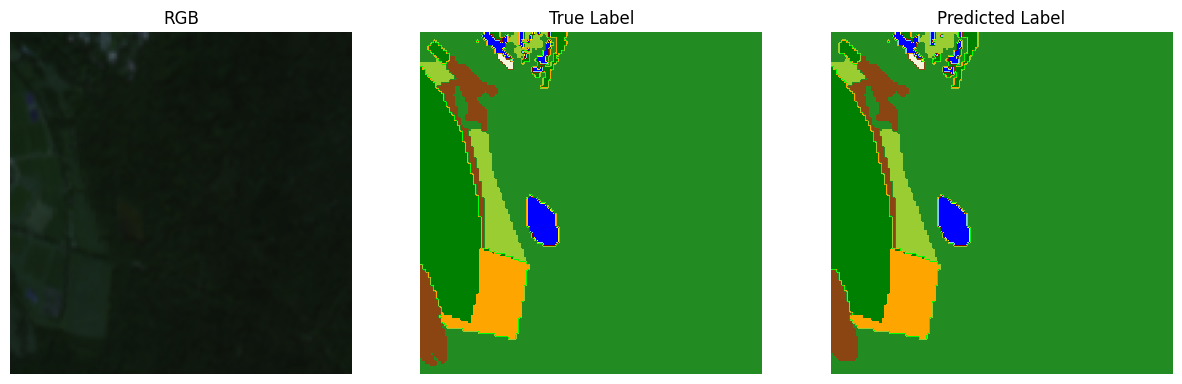

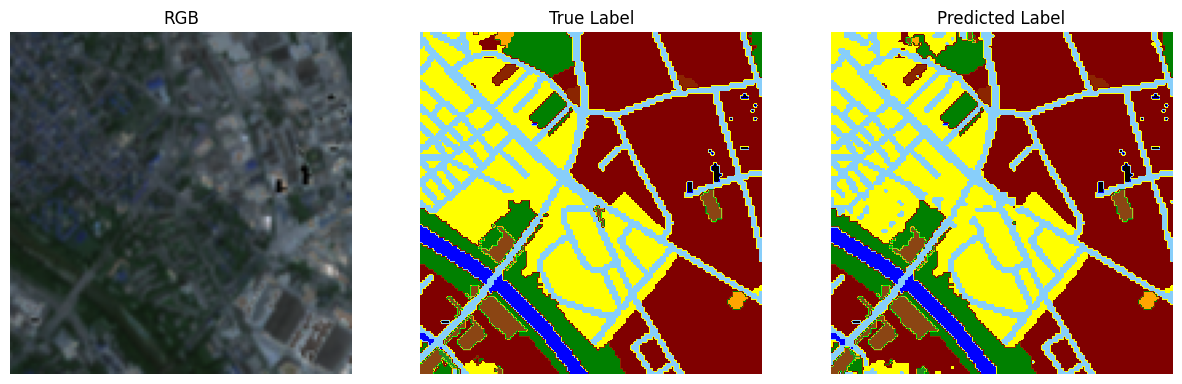

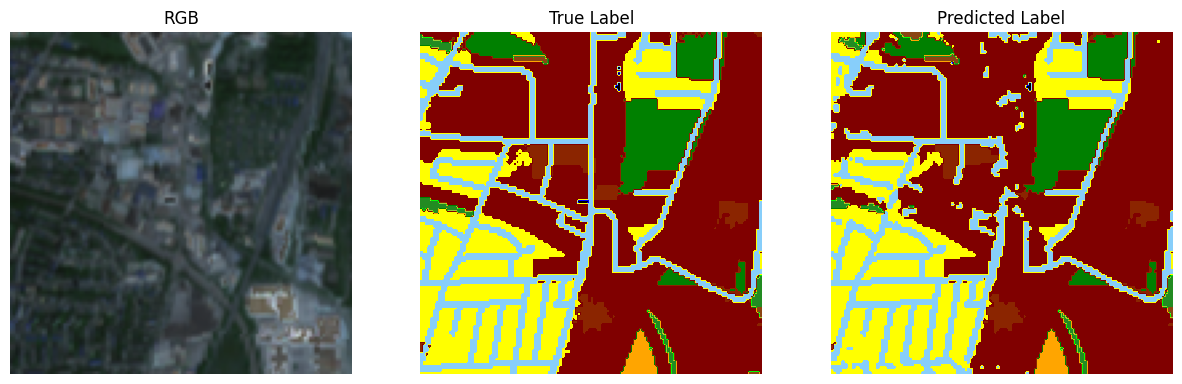

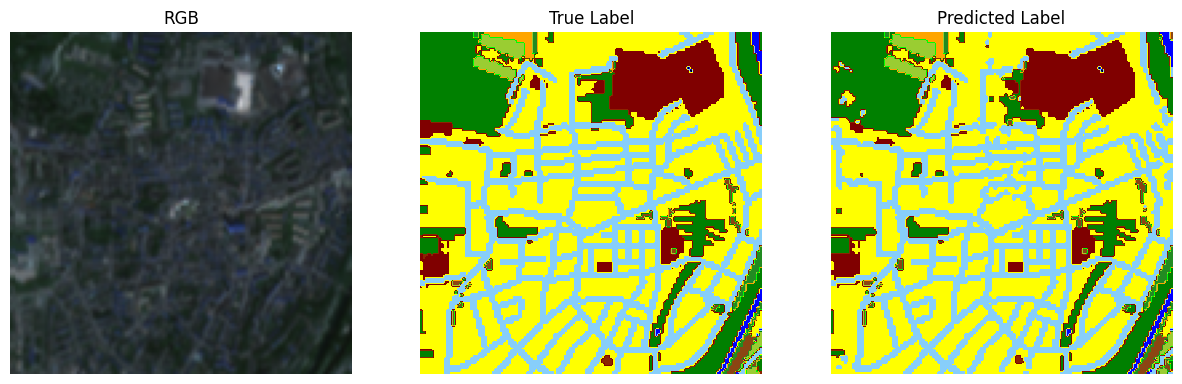

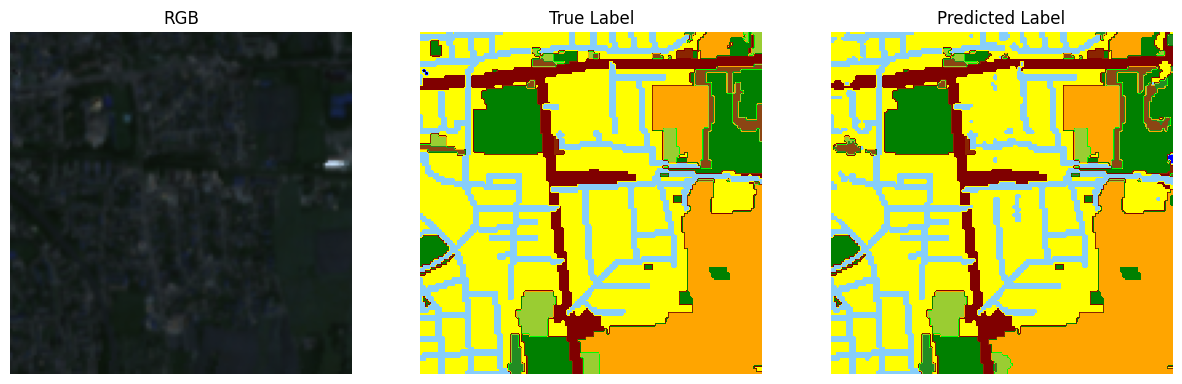

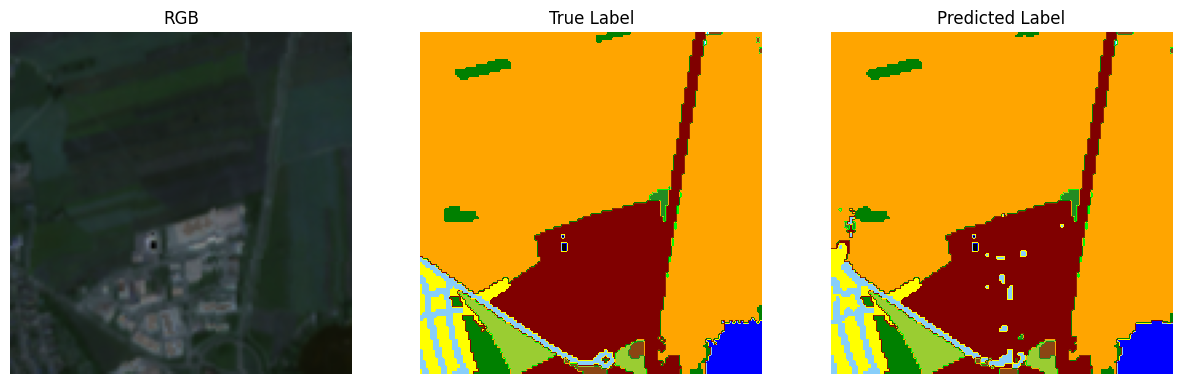

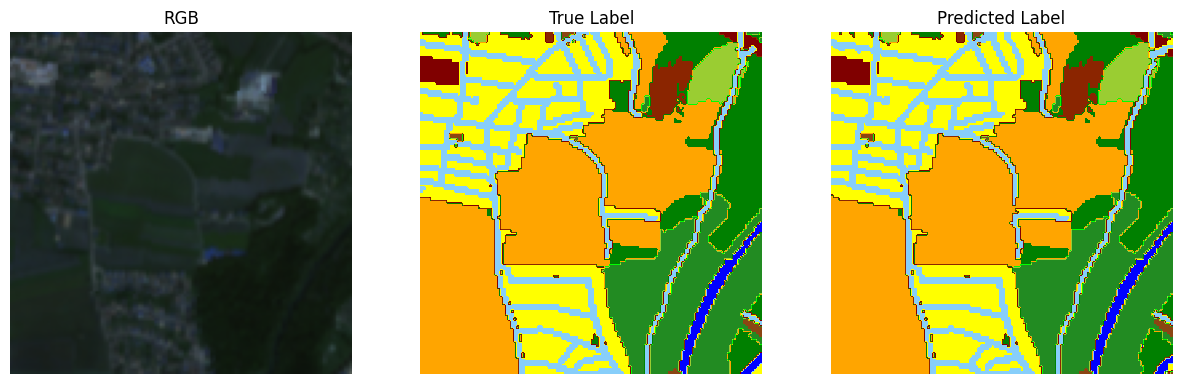

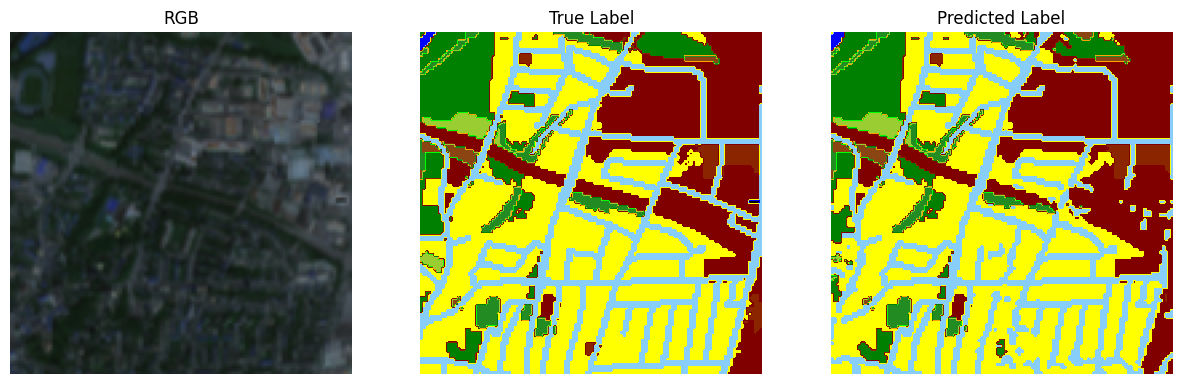

In [25]:
import random

best_model.eval()
random_indices = random.sample(range(len(test_loader.dataset)), 10)

for index in random_indices:
  image, label = test_loader.dataset[index]
  image = image.to(device)
  label = label.to(device)

  with torch.inference_mode():
    output = best_model(image.unsqueeze(0))
    predicted_label = torch.argmax(output, dim=1).squeeze().cpu().numpy()
  plt.figure(figsize=(15, 15))

  image = image - image.min()
  image = image / image.max()
  plt.subplot(1, 3, 1)
  plt.title("RGB")
  plt.imshow(image[0:3].permute(1, 2, 0).cpu().numpy())
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.title("True Label")
  plt.imshow(label.cpu().numpy(), cmap=cmap, vmin=0, vmax=NUM_CLASSES-1)
  plt.axis("off")

  plt.subplot(1, 3, 3)
  plt.title("Predicted Label")
  plt.imshow(predicted_label, cmap=cmap, vmin=0, vmax=NUM_CLASSES-1)
  plt.axis("off")

  plt.subplots_adjust(hspace=0.09)

  plt.show()
